# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Mounting Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
from matplotlib import pyplot as plt

In [ ]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tesla stock price prediction_Rohit_Raj_Coursera/TSLA.csv')

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,224.603333,243.576660,224.333328,237.036667,237.036667,122793000
1,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
2,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
3,2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
4,2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
...,...,...,...,...,...,...,...
245,2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900
246,2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
247,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
248,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,210.282866,215.095373,205.239520,210.311067,210.311067,1.203104e+08
std,51.343329,52.017230,50.673955,51.298323,51.298323,4.939940e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.367504,182.379997,172.502499,178.187496,178.187496,8.115030e+07
50%,198.234993,202.845001,192.885002,197.474998,197.474998,1.100234e+08
75%,245.007496,250.626663,238.946667,244.507500,244.507500,1.539928e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
px.area(df,x='Date',y='Volume')

In [ ]:
px.bar(df, x='Date',y='Volume')

In [ ]:
px.box(df,y='Close')

# Understanding Facebook Prophet

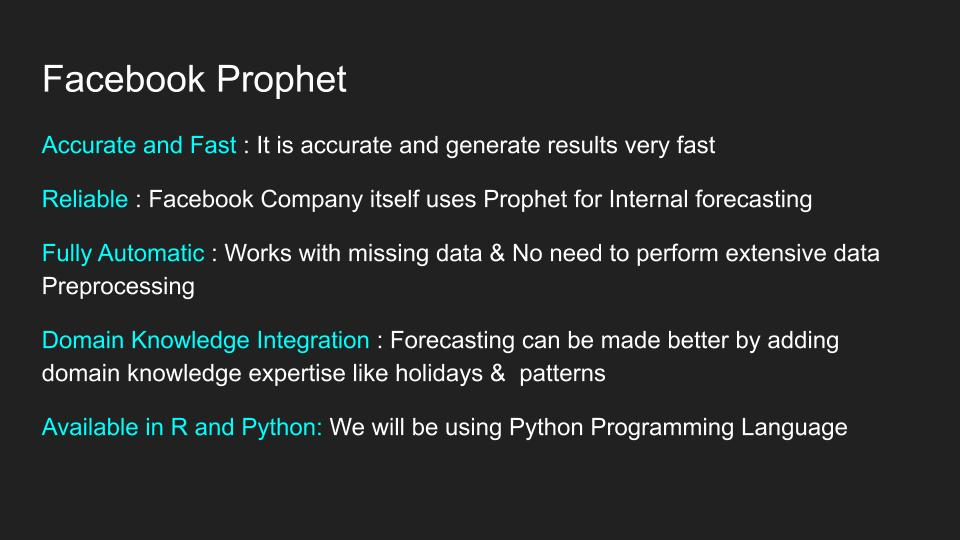

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-21,224.603333,243.576660,224.333328,237.036667,237.036667,122793000
1,2022-06-22,234.503326,246.833328,233.826660,236.086670,236.086670,101107500
2,2022-06-23,237.906662,239.316666,228.636673,235.070007,235.070007,104202600
3,2022-06-24,237.470001,246.066666,236.086670,245.706665,245.706665,95770800
4,2022-06-27,249.366669,252.070007,242.566666,244.919998,244.919998,89178300
...,...,...,...,...,...,...,...
245,2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900
246,2023-06-13,253.509995,259.679993,251.339996,258.709991,258.709991,162384300
247,2023-06-14,260.170013,261.570007,250.500000,256.790009,256.790009,170575500
248,2023-06-15,248.399994,258.950012,247.289993,255.899994,255.899994,160171200


In [ ]:
  columns = ['Date','Close']
  ndf = pd.DataFrame(df, columns = columns)

In [ ]:
ndf

,Date,Close
0,2022-06-21,237.036667
1,2022-06-22,236.086670
2,2022-06-23,235.070007
3,2022-06-24,245.706665
4,2022-06-27,244.919998
...,...,...
245,2023-06-12,249.830002
246,2023-06-13,258.709991
247,2023-06-14,256.790009
248,2023-06-15,255.899994


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2022-06-21,237.036667
1,2022-06-22,236.086670
2,2022-06-23,235.070007
3,2022-06-24,245.706665
4,2022-06-27,244.919998
...,...,...
245,2023-06-12,249.830002
246,2023-06-13,258.709991
247,2023-06-14,256.790009
248,2023-06-15,255.899994


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw969adjh/13cdjv65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw969adjh/wyjgcml0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58439', 'data', 'file=/tmp/tmpw969adjh/13cdjv65.json', 'init=/tmp/tmpw969adjh/wyjgcml0.json', 'output', 'file=/tmp/tmpw969adjh/prophet_models0k6kpjo/prophet_model-20230707070923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-21,253.674884,225.166686,284.348943,253.674884,253.674884,2.076558,2.076558,2.076558,2.076558,2.076558,2.076558,0.0,0.0,0.0,255.751443
1,2022-06-22,253.998214,225.682221,286.220928,253.998214,253.998214,2.754443,2.754443,2.754443,2.754443,2.754443,2.754443,0.0,0.0,0.0,256.752657
2,2022-06-23,254.321544,225.333122,287.113055,254.321544,254.321544,3.298913,3.298913,3.298913,3.298913,3.298913,3.298913,0.0,0.0,0.0,257.620457
3,2022-06-24,254.644873,228.276971,290.648509,254.644873,254.644873,4.242368,4.242368,4.242368,4.242368,4.242368,4.242368,0.0,0.0,0.0,258.887242
4,2022-06-27,255.614862,231.069522,290.179648,255.614862,255.614862,4.980703,4.980703,4.980703,4.980703,4.980703,4.980703,0.0,0.0,0.0,260.595565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-07-12,216.179965,186.009830,250.178830,212.723325,219.814540,2.754443,2.754443,2.754443,2.754443,2.754443,2.754443,0.0,0.0,0.0,218.934407
276,2023-07-13,216.546263,189.168379,250.381426,212.742380,220.446687,3.298913,3.298913,3.298913,3.298913,3.298913,3.298913,0.0,0.0,0.0,219.845176
277,2023-07-14,216.912561,189.701151,250.291592,212.876672,221.081882,4.242368,4.242368,4.242368,4.242368,4.242368,4.242368,0.0,0.0,0.0,221.154930
278,2023-07-15,217.278859,178.010563,238.521627,212.988568,221.629122,-8.676497,-8.676497,-8.676497,-8.676497,-8.676497,-8.676497,0.0,0.0,0.0,208.602362


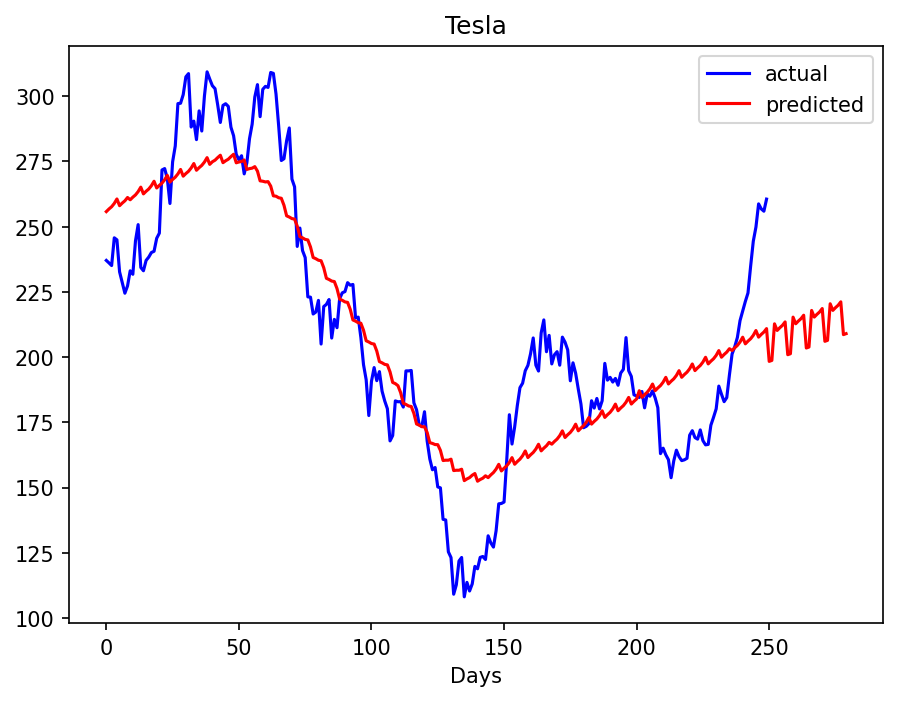

In [ ]:
#Plotting actual v/s predicted using matplotlib

plt.figure(figsize=(7, 5), dpi=150)

prophet_df['y'].plot(label='actual', color='blue')
forecast['yhat'].plot(label='predicted',color='red')


# adding title to the plot
plt.title('Tesla')

# adding Label to the x-axis
plt.xlabel('Days')

# adding legend to the curve
plt.legend()

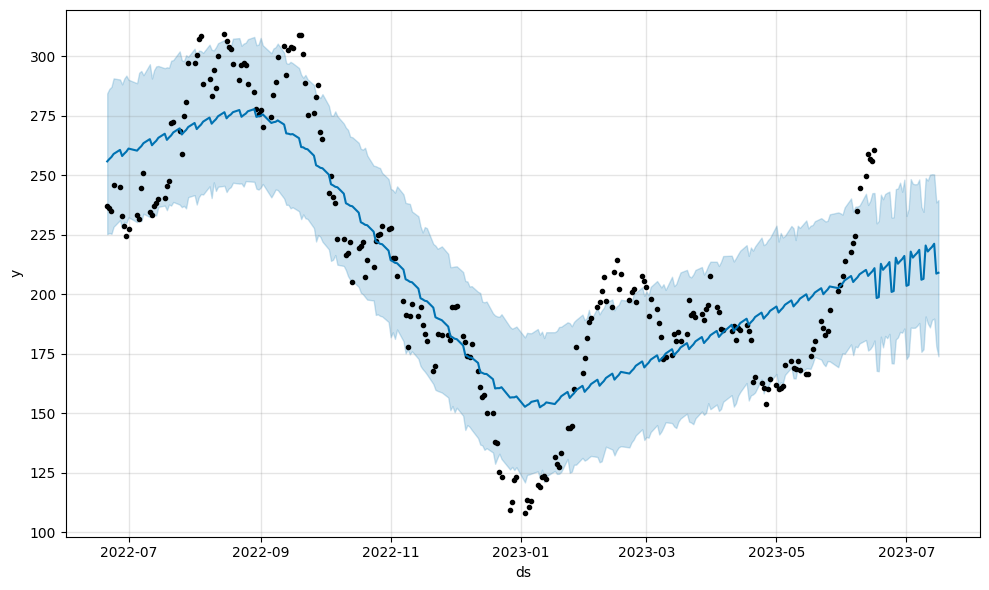

In [ ]:
figure = m.plot(forecast, xlabel='ds',ylabel='y')

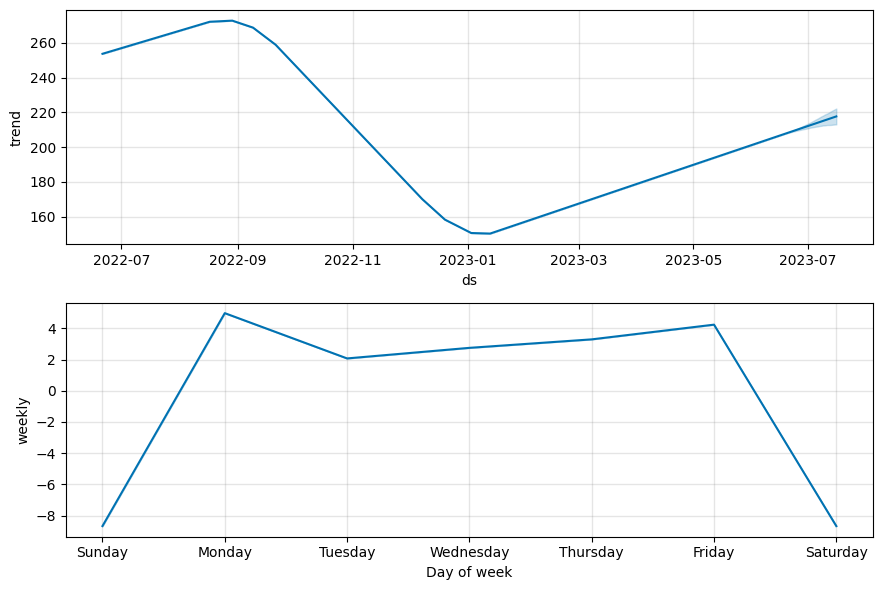

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>